# Music Genre Classification

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

import librosa
import librosa.display
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')

In [8]:
import os
general_path = 'Data'
print(list(os.listdir(f'{general_path}/genres_original/')))

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


## Exploratory Data Analysis

In [9]:
#Lets import one audio of each Genre type
genre = list(os.listdir(f'{general_path}/genres_original/'))
audio_files = []
for i in genre:
    y, sr = librosa.load(f'{general_path}/genres_original/{i}/{i}.00020.wav')
    y, _ = librosa.effects.trim(y)
    audio_files.append([i,y,sr])

In [10]:
print("y:",audio_files[0][1],"\n")
print("y shape:",np.shape(audio_files[0][1]),"\n")
print("Sample Rate (kHz):",audio_files[0][2],"\n")
print("Length of Audio:",len(audio_files[0][1])/audio_files[0][2])

y: [-0.03634644 -0.05361938 -0.04153442 ... -0.10464478 -0.15408325
 -0.17166138] 

y shape: (661794,) 

Sample Rate (kHz): 22050 

Length of Audio: 30.013333333333332


In [11]:
colors = ["#fa6ecb"
,"#ff69aa"
,"#ff6d87"
,"#ff7b66"
,"#ff8e47"
,"#f6a22c"
,"#d9b41b"
,"#b6c426"
,"#8bd246"
,"#4bdd6d"
]

### 2D representation of Sound Waves -- Time Domain

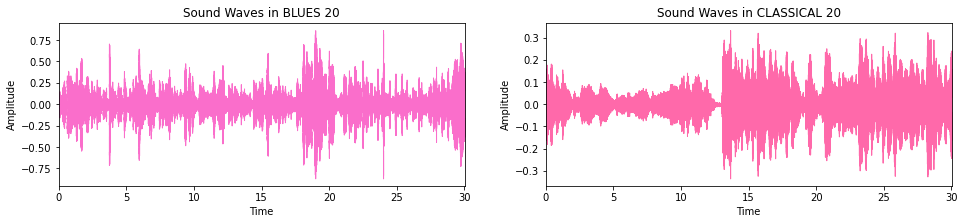

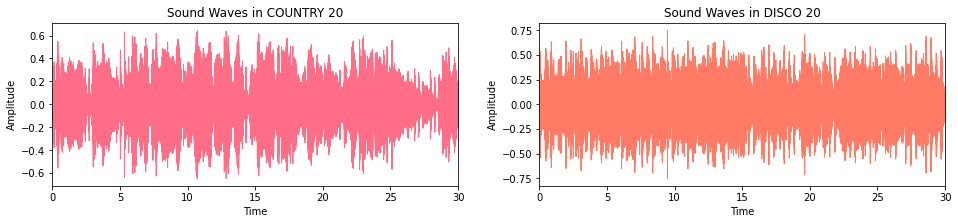

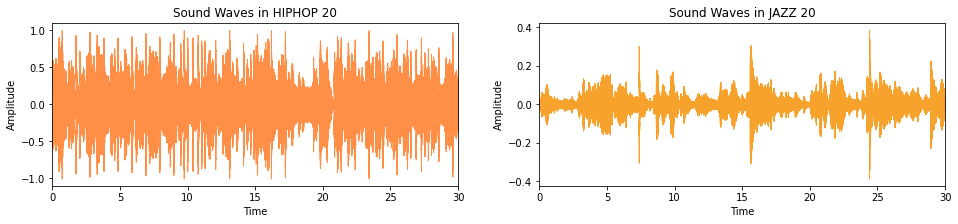

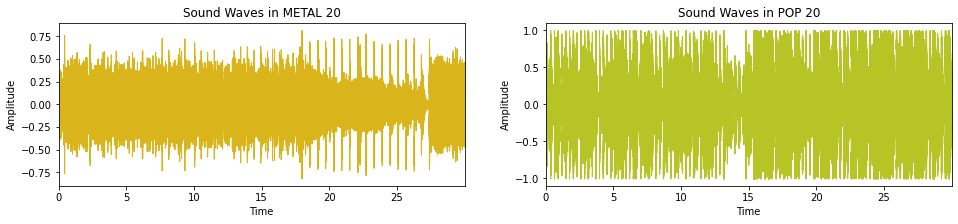

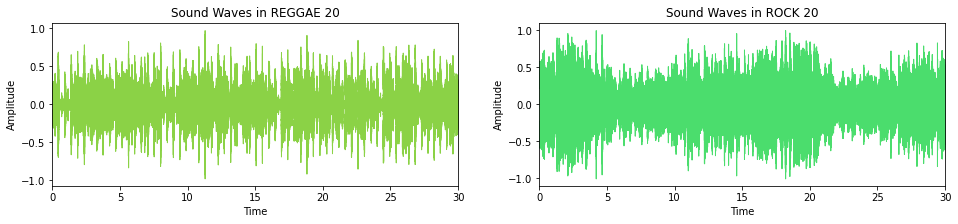

In [12]:
for i in range(0,10,2):
    plt.figure(figsize = (16, 3))
    for j in range(2):
        plt.subplot(1, 2, 1+j)
        librosa.display.waveplot(y = audio_files[i+j][1], sr = audio_files[i+j][2], color = colors[i+j])
        plt.ylabel('Amplitude')
        plt.title(f"Sound Waves in {audio_files[i+j][0].upper()} 20")
#     plt.savefig(f'Sound Waves-{audio_files[i][0].upper()}-{audio_files[i+1][0].upper()}.png')

### Short Time Fourier Transform -- Frequency Domain

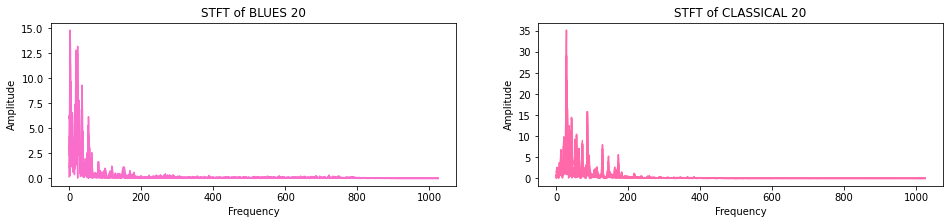

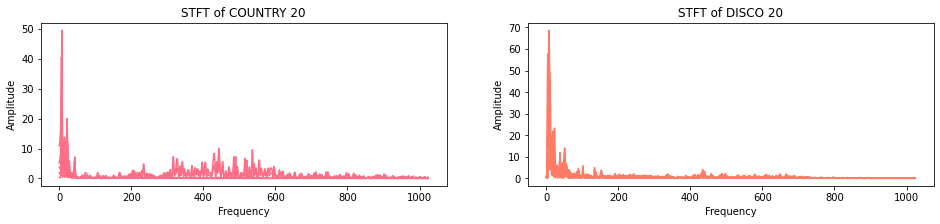

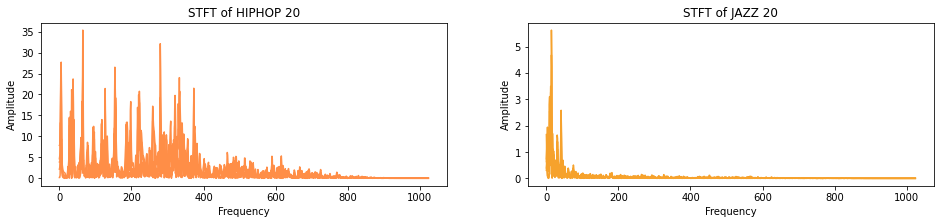

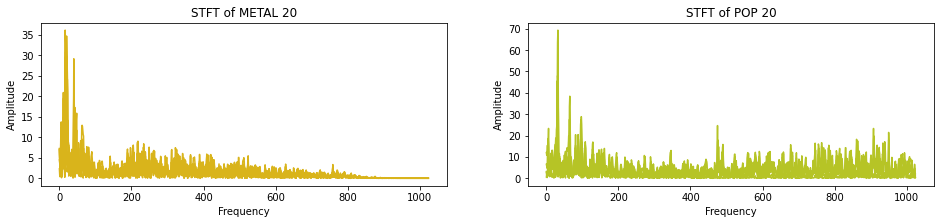

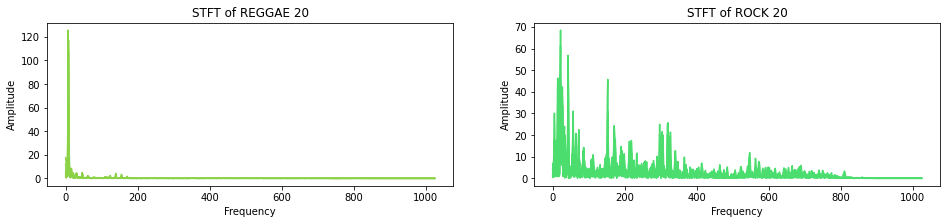

In [13]:
n_fft = 2048
hop_length = 512
for i in range(0,10,2):
    plt.figure(figsize = (16,3))
    for j in range(2):
        plt.subplot(1, 2, j+1)
        FT = np.abs(librosa.stft(audio_files[i+j][1][:n_fft], hop_length = hop_length))
        plt.plot(FT,color = colors[i+j]);
        plt.xlabel('Frequency')
        plt.ylabel('Amplitude')
        plt.title(f"STFT of {audio_files[i+j][0].upper()} 20");
#     plt.savefig(f'STFT-{audio_files[i][0].upper()}-{audio_files[i+1][0].upper()}.png')

### Spectogram -- Time-Frequency Domain

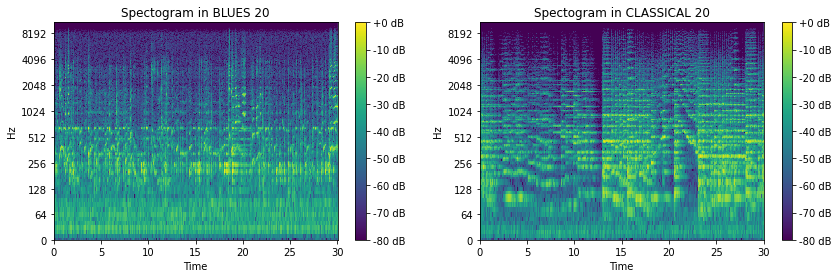

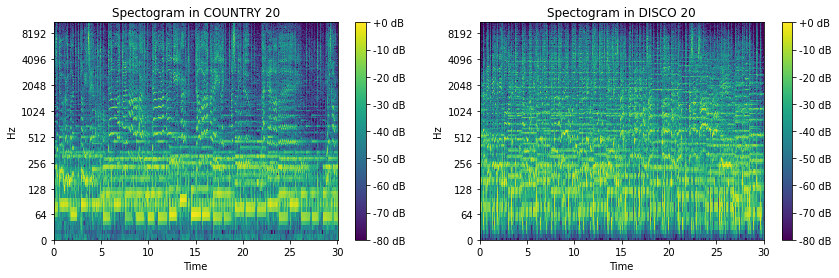

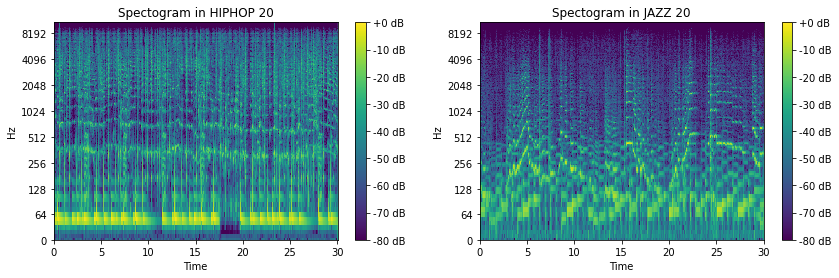

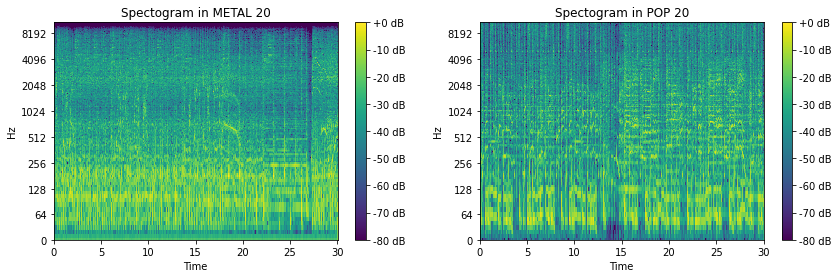

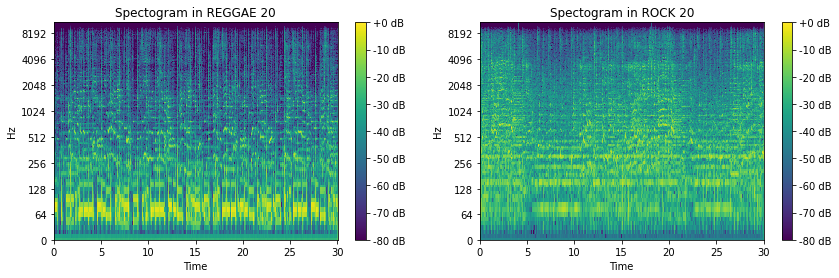

In [14]:
for i in range(0,10,2):
    plt.figure(figsize = (14,4))
    for j in range(2):
        plt.subplot(1, 2, 1+j)
        D = np.abs(librosa.stft(audio_files[i+j][1], n_fft=n_fft,  hop_length=hop_length))
        DB = librosa.amplitude_to_db(D, ref=np.max)
        librosa.display.specshow(DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log',cmap = 'viridis');
        plt.colorbar(format='%+2.0f dB')
        plt.title(f"Spectogram in {audio_files[i+j][0].upper()} 20");
#     plt.savefig(f'Spectogram-{audio_files[i][0].upper()}-{audio_files[i+1][0].upper()}.png')

Spectogram help us to see sound<br>
X-axis : Time<br>
Y-axis : Pitch<br>
(The lower the pitch, the lower it shows us on the graph..... and higher the pitch the pitch, the higher it shows us on the graph)<br>
Colour : Volume<br>
(Yellowish-Green) - High Volume<br>
(Blueish) - Low Volume<br>
(Blackish) - No Volume<br>
Spectogram is a great a tool to understand Timbre<br>
Timbre means quality of sound<br>
When there are not many overtone we say timbre is dark - Whistling<br>
When there are many overtone we say timbre is bright - Shouting Hey<br>
When we speak our vocal makes very bright timbre..we use our mouth to control overtone

### Mel Scale

Text(0.5, 1.0, 'One sampled window for example, before and after converting to mel.')

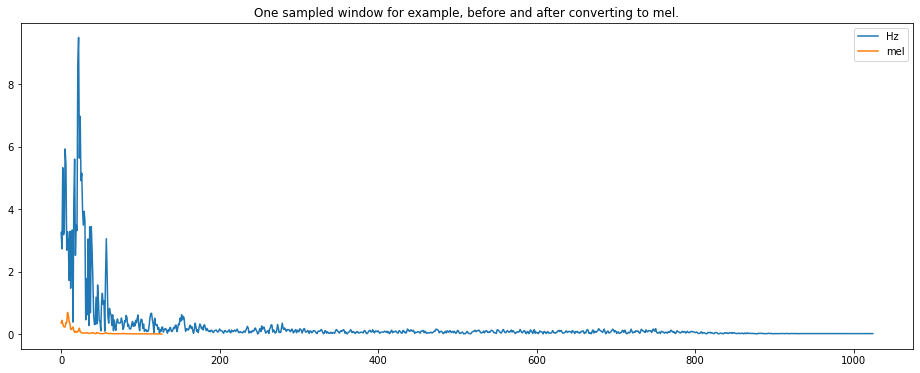

In [15]:
n_mels = 128
mel = librosa.filters.mel(sr=audio_files[0][2], n_fft=n_fft, n_mels=n_mels)
D = np.abs(librosa.stft(audio_files[0][1], n_fft=n_fft,  hop_length=hop_length))
plt.figure(figsize = (16,6))
plt.plot(D[:,1])
plt.plot(mel.dot(D[:,1]))
plt.legend(labels=['Hz', 'mel'])
plt.title('One sampled window for example, before and after converting to mel.')
# plt.savefig(f'MELscale-eg.png')

### Mel Spectogram

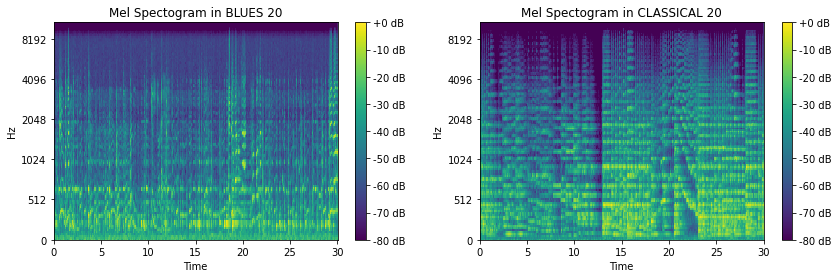

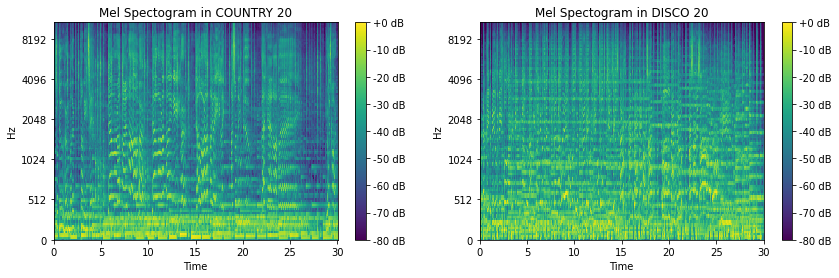

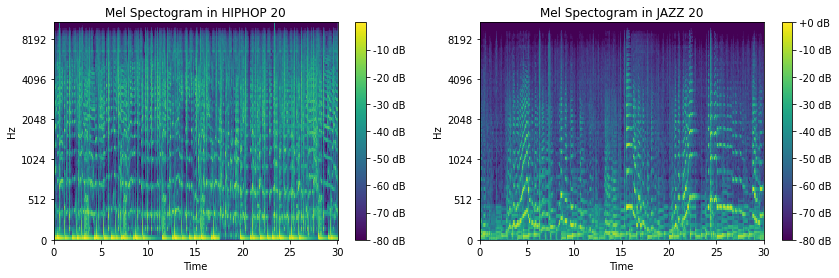

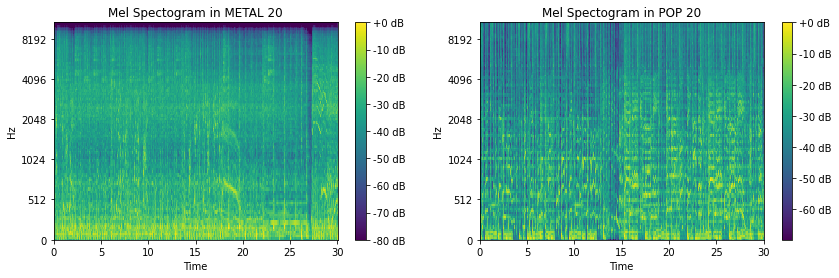

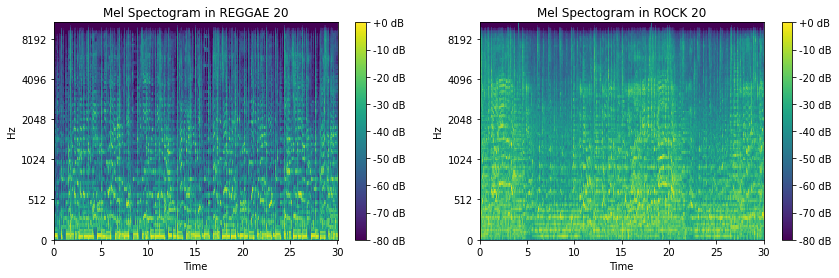

In [16]:
for i in range(0,10,2):
    plt.figure(figsize = (14,4))
    for j in range(2):
        plt.subplot(1, 2, 1+j)
        S = librosa.feature.melspectrogram(audio_files[i+j][1],
                                           sr=audio_files[i+j][2],
                                           n_fft=n_fft,
                                           hop_length=hop_length,
                                           n_mels=n_mels)
        S_DB = librosa.power_to_db(S, ref=np.max)
        librosa.display.specshow(S_DB, 
                                 sr=audio_files[i+j][2],
                                 hop_length=hop_length,
                                 x_axis = 'time',
                                 y_axis = 'mel',
                                 cmap = 'viridis');
        plt.colorbar(format='%+2.0f dB')
        plt.title(f"Mel Spectogram in {audio_files[i+j][0].upper()} 20")
#     plt.savefig(f'Mel Spectogram-{audio_files[i][0].upper()}-{audio_files[i+1][0].upper()}.png')

### Beat Tracking, Onset strength, and Tempogram

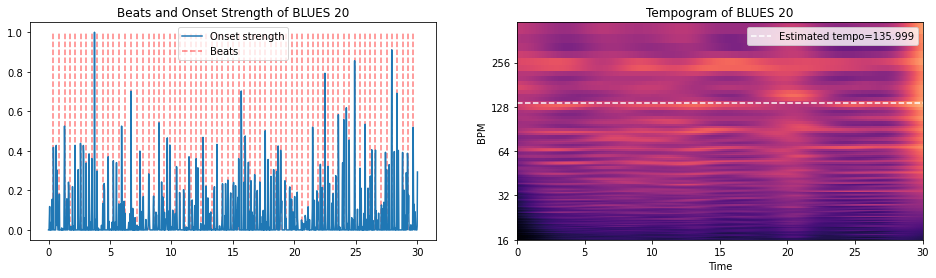

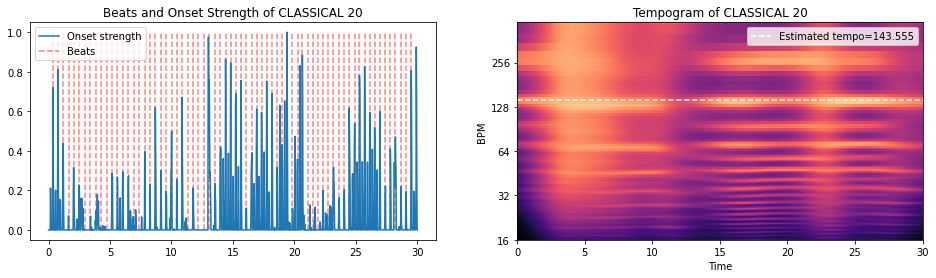

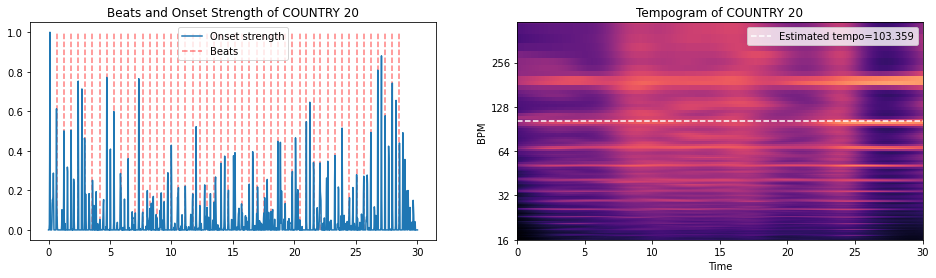

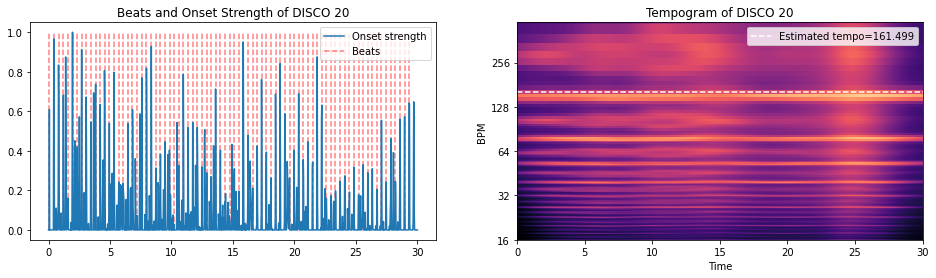

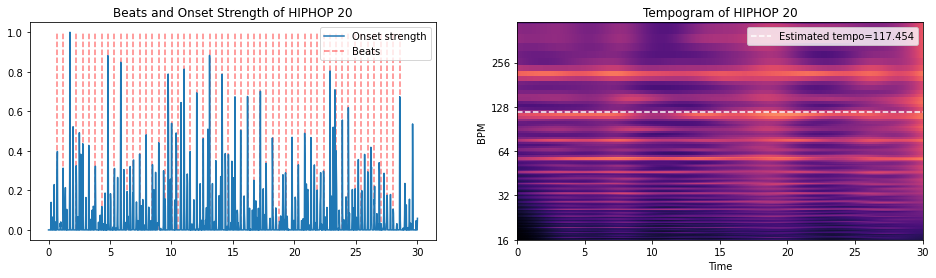

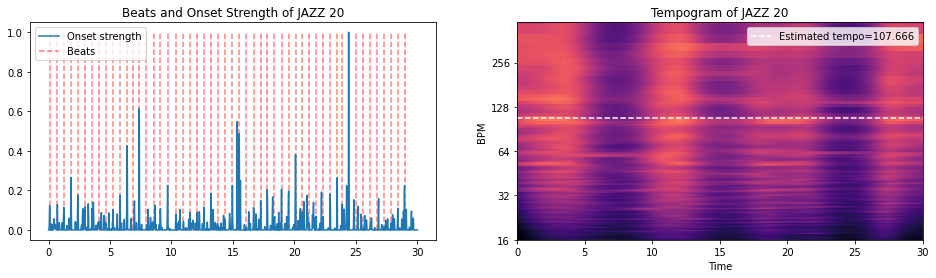

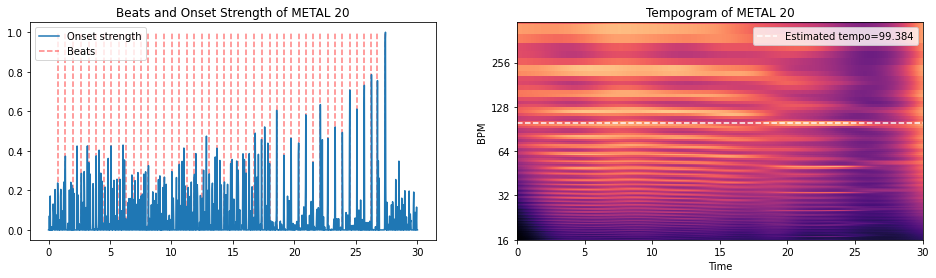

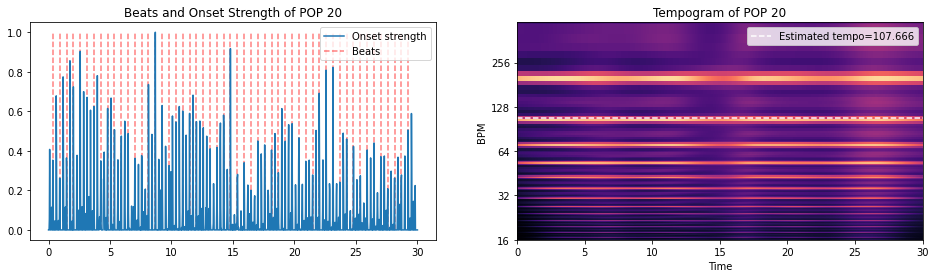

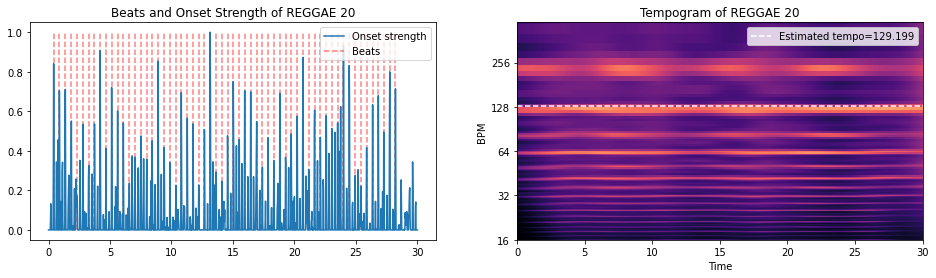

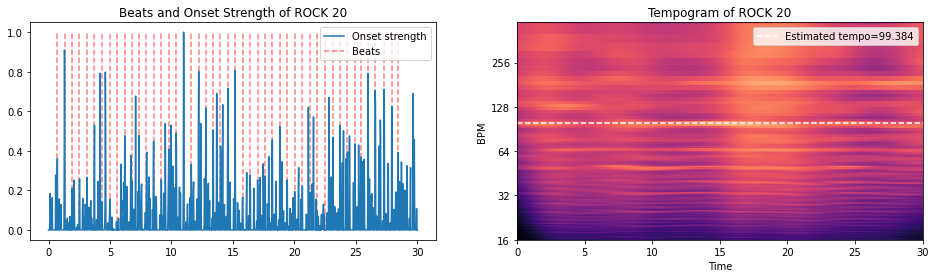

In [17]:
for i in range(10):
    y=audio_files[i][1]
    sr=audio_files[i][2]
    plt.figure(figsize=(16,4))
    plt.subplot(1,2,1)
    onset_env = librosa.onset.onset_strength(y,sr=sr,aggregate=np.median,hop_length=hop_length)
    tempo, beats = librosa.beat.beat_track(onset_envelope=onset_env, sr=sr,hop_length=hop_length)
    times = librosa.times_like(onset_env, sr=sr, hop_length=hop_length)
    plt.plot(times, librosa.util.normalize(onset_env),
             label='Onset strength')
    plt.vlines(times[beats], 0, 1, alpha=0.5, color='r',
               linestyle='--', label='Beats')
    plt.legend()
    plt.title(f"Beats and Onset Strength of {audio_files[i][0].upper()} 20")
    
    
    
    
    plt.subplot(1,2,2)
    oenv = librosa.onset.onset_strength(y=y, sr=sr, hop_length=hop_length)
    tempogram = librosa.feature.tempogram(onset_envelope=oenv, sr=sr,
                                      hop_length=hop_length)
    librosa.display.specshow(tempogram, sr=sr, hop_length=hop_length,
                         x_axis='time', y_axis='tempo', cmap='magma')
    plt.axhline(tempo, color='w', linestyle='--', alpha=1,
            label='Estimated tempo={:g}'.format(tempo))
    plt.legend(loc='upper right')
    plt.title(f"Tempogram of {audio_files[i][0].upper()} 20")
#     plt.savefig(f'Beat Tracking-{audio_files[i][0].upper()}.png')

### Harmonics and Perceptrual

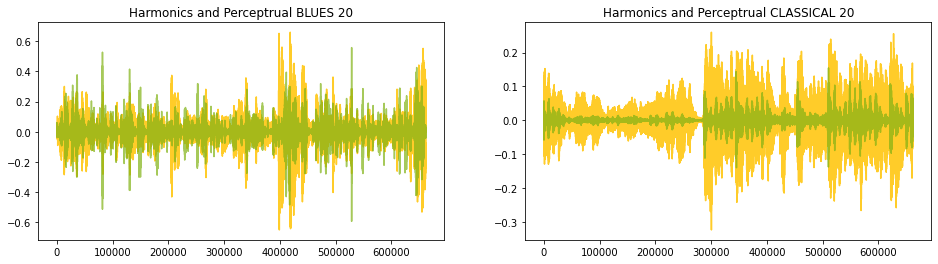

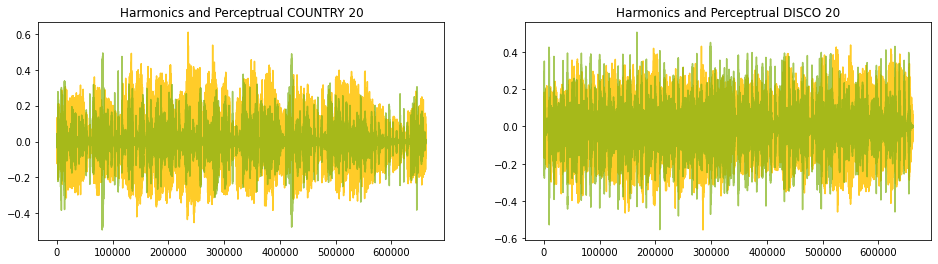

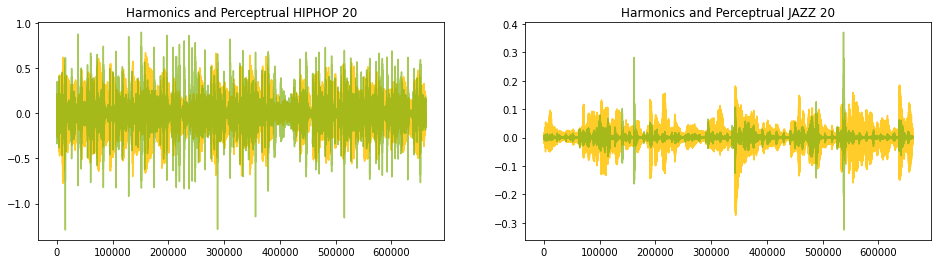

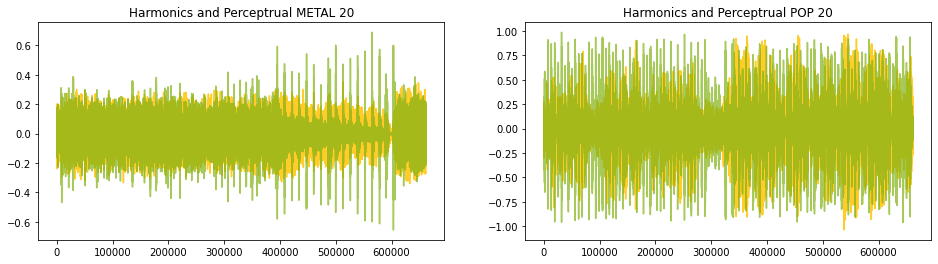

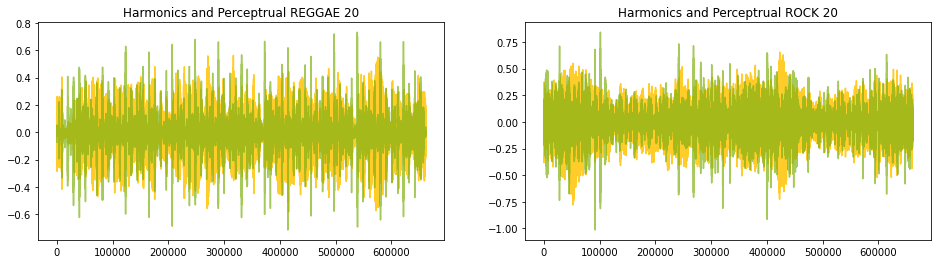

In [18]:
for i in range(0,10,2):
    plt.figure(figsize=(16,4))
    for j in range(2):
        plt.subplot(1,2,j+1)
        y=audio_files[i+j][1]
        y_harm, y_perc = librosa.effects.hpss(y)
        plt.plot(y_harm, color = '#ffcc29');
        plt.plot(y_perc, color = '#81b214',alpha=0.7);
        plt.title(f"Harmonics and Perceptrual {audio_files[i+j][0].upper()} 20")
#     plt.savefig(f'Harmonics Perceptrual-{audio_files[i][0].upper()}-{audio_files[i+1][0].upper()}.png')
        

### Spectral Rolloff

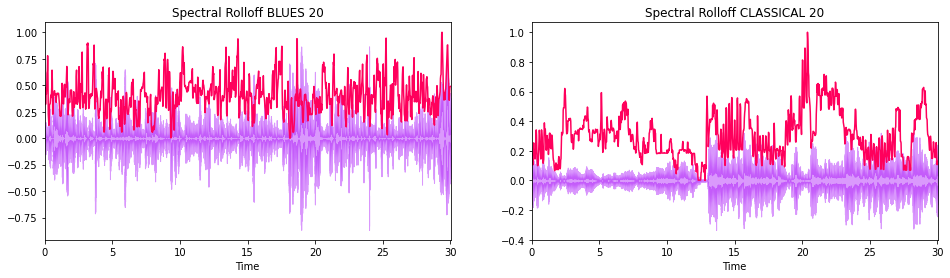

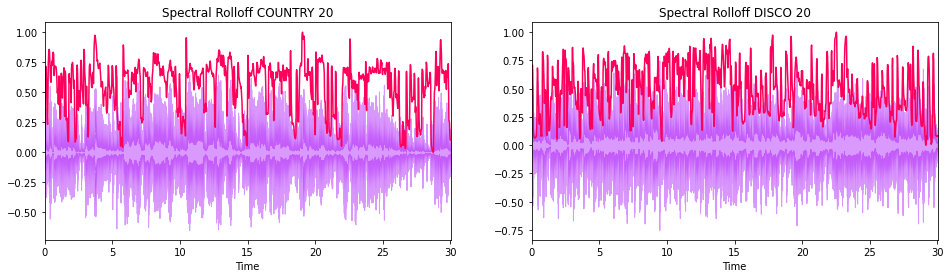

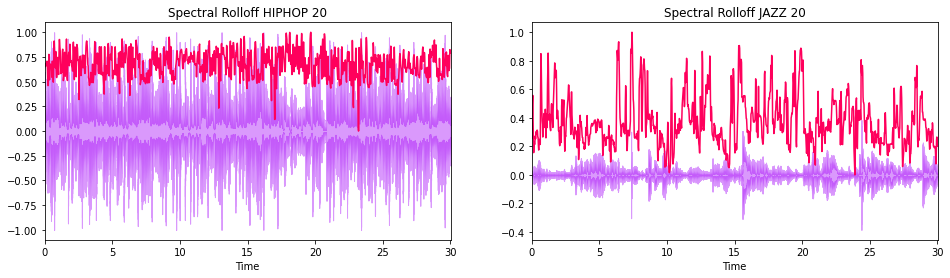

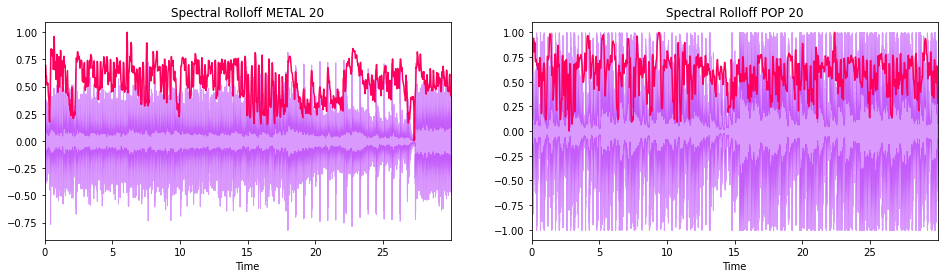

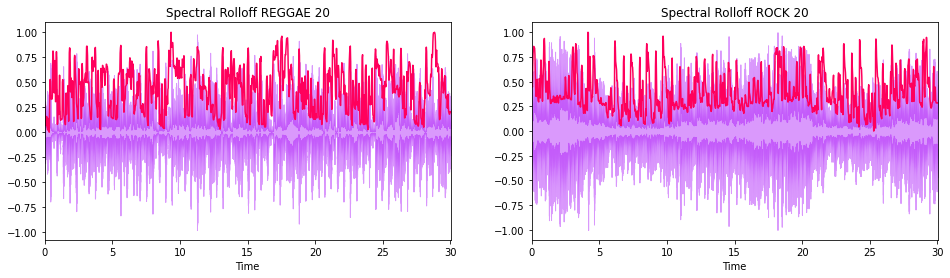

In [19]:
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

for i in range(0,10,2):
    plt.figure(figsize=(16,4))
    for j in range(2):
        y=audio_files[i+j][1]
        sr=audio_files[i+j][2]
        plt.subplot(1,2,j+1)
        spectral_centroids = librosa.feature.spectral_centroid(y, sr=sr)[0]
        frames = range(len(spectral_centroids))
        t = librosa.frames_to_time(frames)
        spectral_rolloff = librosa.feature.spectral_rolloff(y, sr=sr)[0]
        librosa.display.waveplot(y, sr=sr, alpha=0.4, color = '#A300F9');
        plt.plot(t, normalize(spectral_rolloff), color='#ff005c')
        plt.title(f"Spectral Rolloff {audio_files[i+j][0].upper()} 20")
#     plt.savefig(f'Spectral Rolloff-{audio_files[i][0].upper()}-{audio_files[i+1][0].upper()}.png')

## Audio Features

In [20]:
data = pd.read_csv(f'{general_path}/features_30_sec.csv')
data.head()

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.wav  661794          0.350088         0.088757  0.130228   
1  blues.00001.wav  661794          0.340914         0.094980  0.095948   
2  blues.00002.wav  661794          0.363637         0.085275  0.175570   
3  blues.00003.wav  661794          0.404785         0.093999  0.141093   
4  blues.00004.wav  661794          0.308526         0.087841  0.091529   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.002827             1784.165850          129774.064525   
1  0.002373             1530.176679          375850.073649   
2  0.002746             1552.811865          156467.643368   
3  0.006346             1070.106615          184355.942417   
4  0.002303             1835.004266          343399.939274   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              2002.449060            85882.761315  ...   52.420910   
1              2039.036516           213843.755497  ...   55.356403   
2              1747.702312            76254.192257  ...   40.598766   
3              1596.412872           166441.494769  ...   44.427753   
4              1748.172116            88445.209036  ...   86.099236   

   mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  \
0    -1.690215   36.524071    -0.408979   41.597103    -2.303523   55.062923   
1    -0.731125   60.314529     0.295073   48.120598    -0.283518   51.106190   
2    -7.729093   47.639427    -1.816407   52.382141    -3.439720   46.639660   
3    -3.319597   50.206673     0.636965   37.319130    -0.619121   37.259739   
4    -5.454034   75.269707    -0.916874   53.613918    -4.404827   62.910812   

   mfcc20_mean  mfcc20_var  label  
0     1.221291   46.936035  blues  
1     0.531217   45.786282  blues  
2    -2.231258   30.573025  blues  
3    -3.407448   31.949339  blues  
4   -11.703234   55.195160  blues  

[5 rows x 60 columns]

In [21]:
data.isnull().sum().sum()

0

### Correlation Matrix for Mean Variables

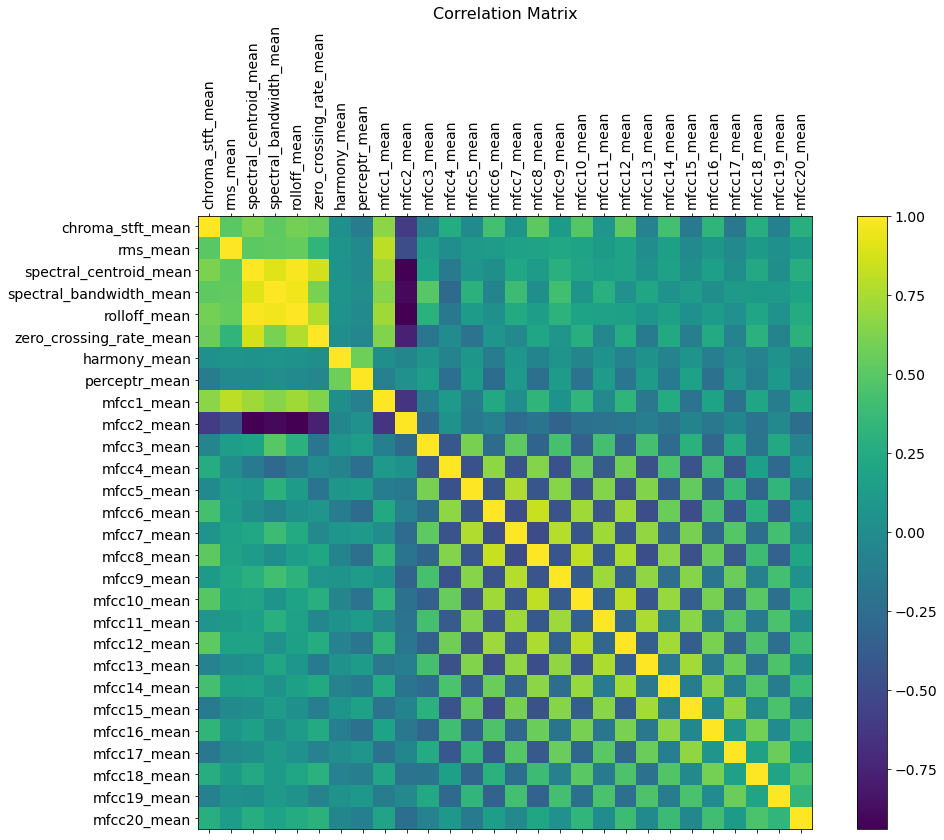

In [22]:
mean_col = [col for col in data.columns if "mean" in col]
df_mean = data[mean_col].corr()
f = plt.figure(figsize=(16, 11))
plt.matshow(df_mean, fignum=f.number)
plt.xticks(range(df_mean.select_dtypes(['number']).shape[1]), df_mean.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(df_mean.select_dtypes(['number']).shape[1]), df_mean.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);
# plt.savefig(f'Correlation.png')

### Zero-Crossing Rate

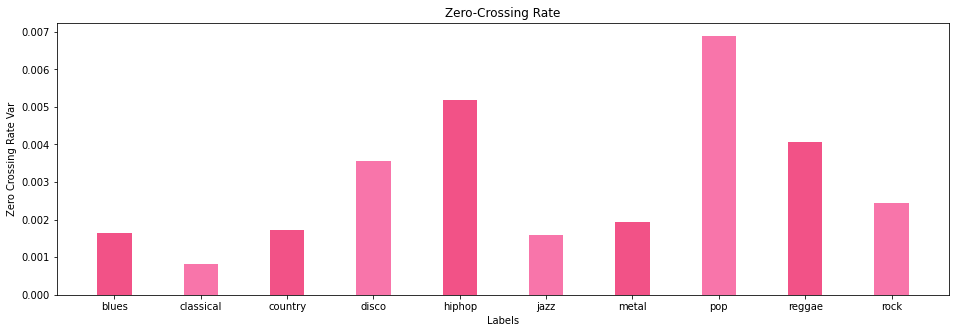

In [23]:
df_zcr = data[["label","zero_crossing_rate_var"]]
df_zcr = df_zcr.groupby("label")["zero_crossing_rate_var"].mean()

fig = plt.figure(figsize = (16, 5))
plt.bar(df_zcr.index, df_zcr.values, color =['#f25287','#f875aa'],
        width = 0.4)
 
plt.xlabel("Labels")
plt.ylabel("Zero Crossing Rate Var")
plt.title("Zero-Crossing Rate")
plt.show()
# plt.savefig(f'ZCR.png')

### Tempo

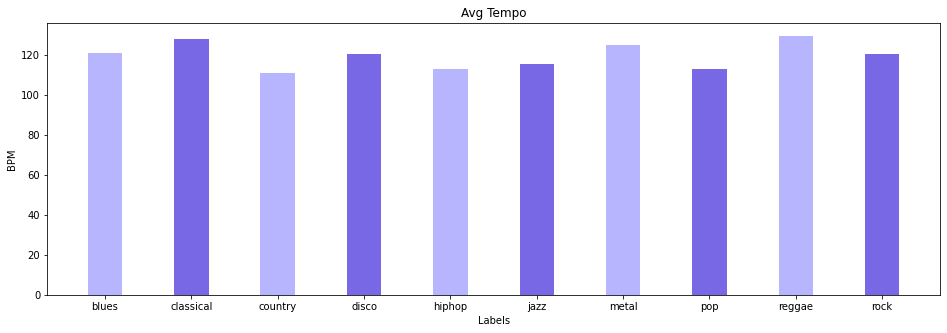

In [24]:
df_zcr = data[["label","tempo"]]
df_zcr = df_zcr.groupby("label")["tempo"].mean()

fig = plt.figure(figsize = (16, 5))
plt.bar(df_zcr.index, df_zcr.values, color =['#b8b5ff','#7868e6'],
        width = 0.4)
 
plt.xlabel("Labels")
plt.ylabel("BPM")
plt.title("Avg Tempo")
plt.show()
# plt.savefig(f'Tempo.png')

### PCA

In [25]:
from sklearn import preprocessing

data = data.iloc[0:, 1:]
y = data['label']
X = data.loc[:, data.columns != 'label']

#### NORMALIZE X ####
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)


#### PCA 2 COMPONENTS ####
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# concatenate with target label
finalDf = pd.concat([principalDf, y], axis = 1)

Text(0, 0.5, 'Principal Component 2')

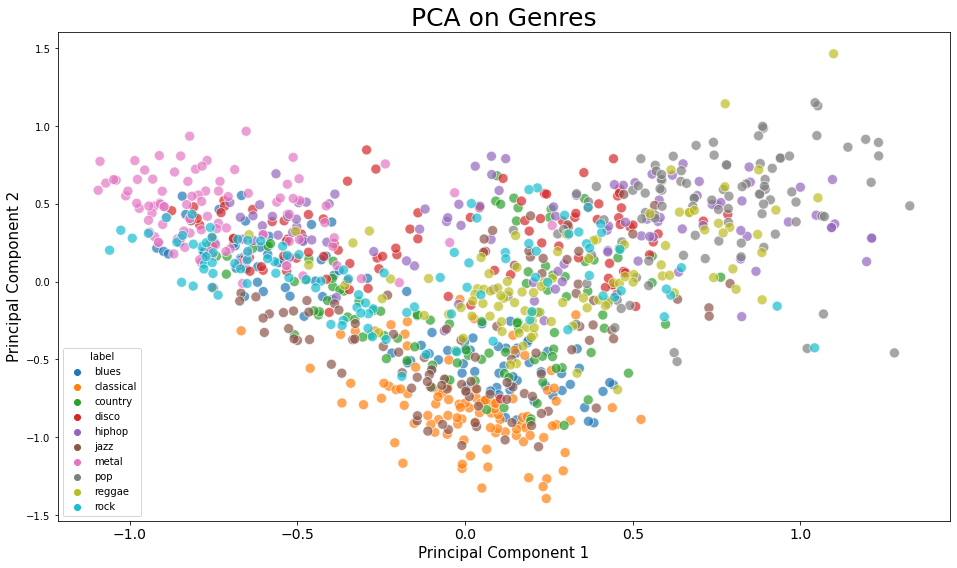

In [26]:
plt.figure(figsize = (16, 9))
sns.scatterplot(x = "principal component 1", y = "principal component 2", data = finalDf, hue = "label", alpha = 0.7,
               s = 100);

plt.title('PCA on Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
# plt.savefig(f'PCA.png')